In [7]:
library(TSCAN)
library(dplyr)
library(ggplot2)

In [8]:
# utility function for setting plot dimensions
set_plot_dimensions = function(width_choice, height_choice) {
    options(repr.plot.width=width_choice, repr.plot.height=height_choice)}

In [9]:
options(warn=-1)

## Testing on toy data set provided by TSCAN

In [69]:
data(lpsdata)
# preprocess: zero-trimming, taking log, gene-clustering
procdata = preprocess(lpsdata)

In [5]:
# cell-clustering based on mclust
lpsmclust = exprmclust(procdata)

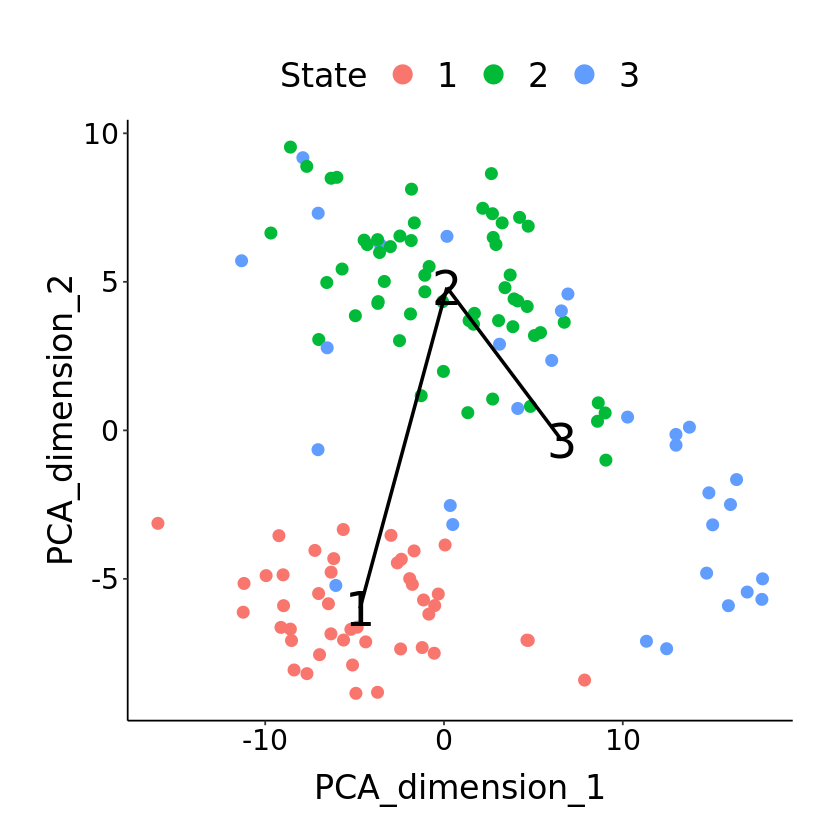

In [6]:
plotmclust(lpsmclust)

In [7]:
# cluster ordering on the minimal spanning tree
lpsorder = TSCANorder(lpsmclust)

In [8]:
# Use difftest function to detect differentially expressed genes given a constructed pseudotemporal ordering.
diffval = difftest(procdata,lpsorder)

In [9]:
# print out a few genes that are significantly changed acrossed the tree nodes (each of which is the mean of 
# cells in the same cluster)
head(row.names(diffval)[diffval$qval < 0.05])

[1] "STX6"     "MRPL28"   "CUTA"     "AI413582" "SNRPC"    "MTCH1"

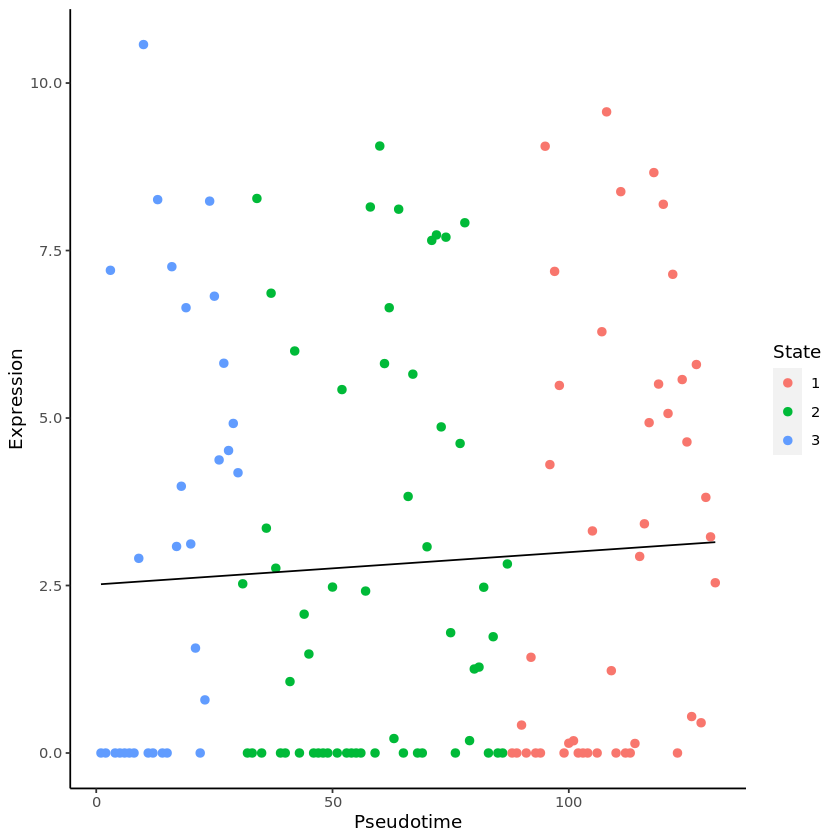

In [10]:
# plot pseudotemporal trajectory of certain gene expression
STAT2expr = log2(lpsdata["STX6",]+1)
singlegeneplot(STAT2expr, TSCANorder(lpsmclust,flip=TRUE,orderonly=FALSE))

## Testing on Using Imported PCA Representation

In [82]:
PCA_matrix = read.csv(file = '/scratch/PCA_coordinates.csv')

In [83]:
rownames(PCA_matrix) = PCA_matrix[,'X']
PCA_matrix = PCA_matrix[,2:ncol(PCA_matrix)]

In [84]:
clusterid = as.numeric(as.factor(PCA_matrix['cluster',]))
PCA_matrix = PCA_matrix[1:nrow(PCA_matrix)-1,]

In [85]:
names(clusterid) = colnames(PCA_matrix)

In [86]:
# the reduce=F argument is crucial, without it the function performs SVD again
PCA_cluster = exprmclust(PCA_matrix,cluster=clusterid,reduce=F)

In [87]:
set_plot_dimensions(20,20)

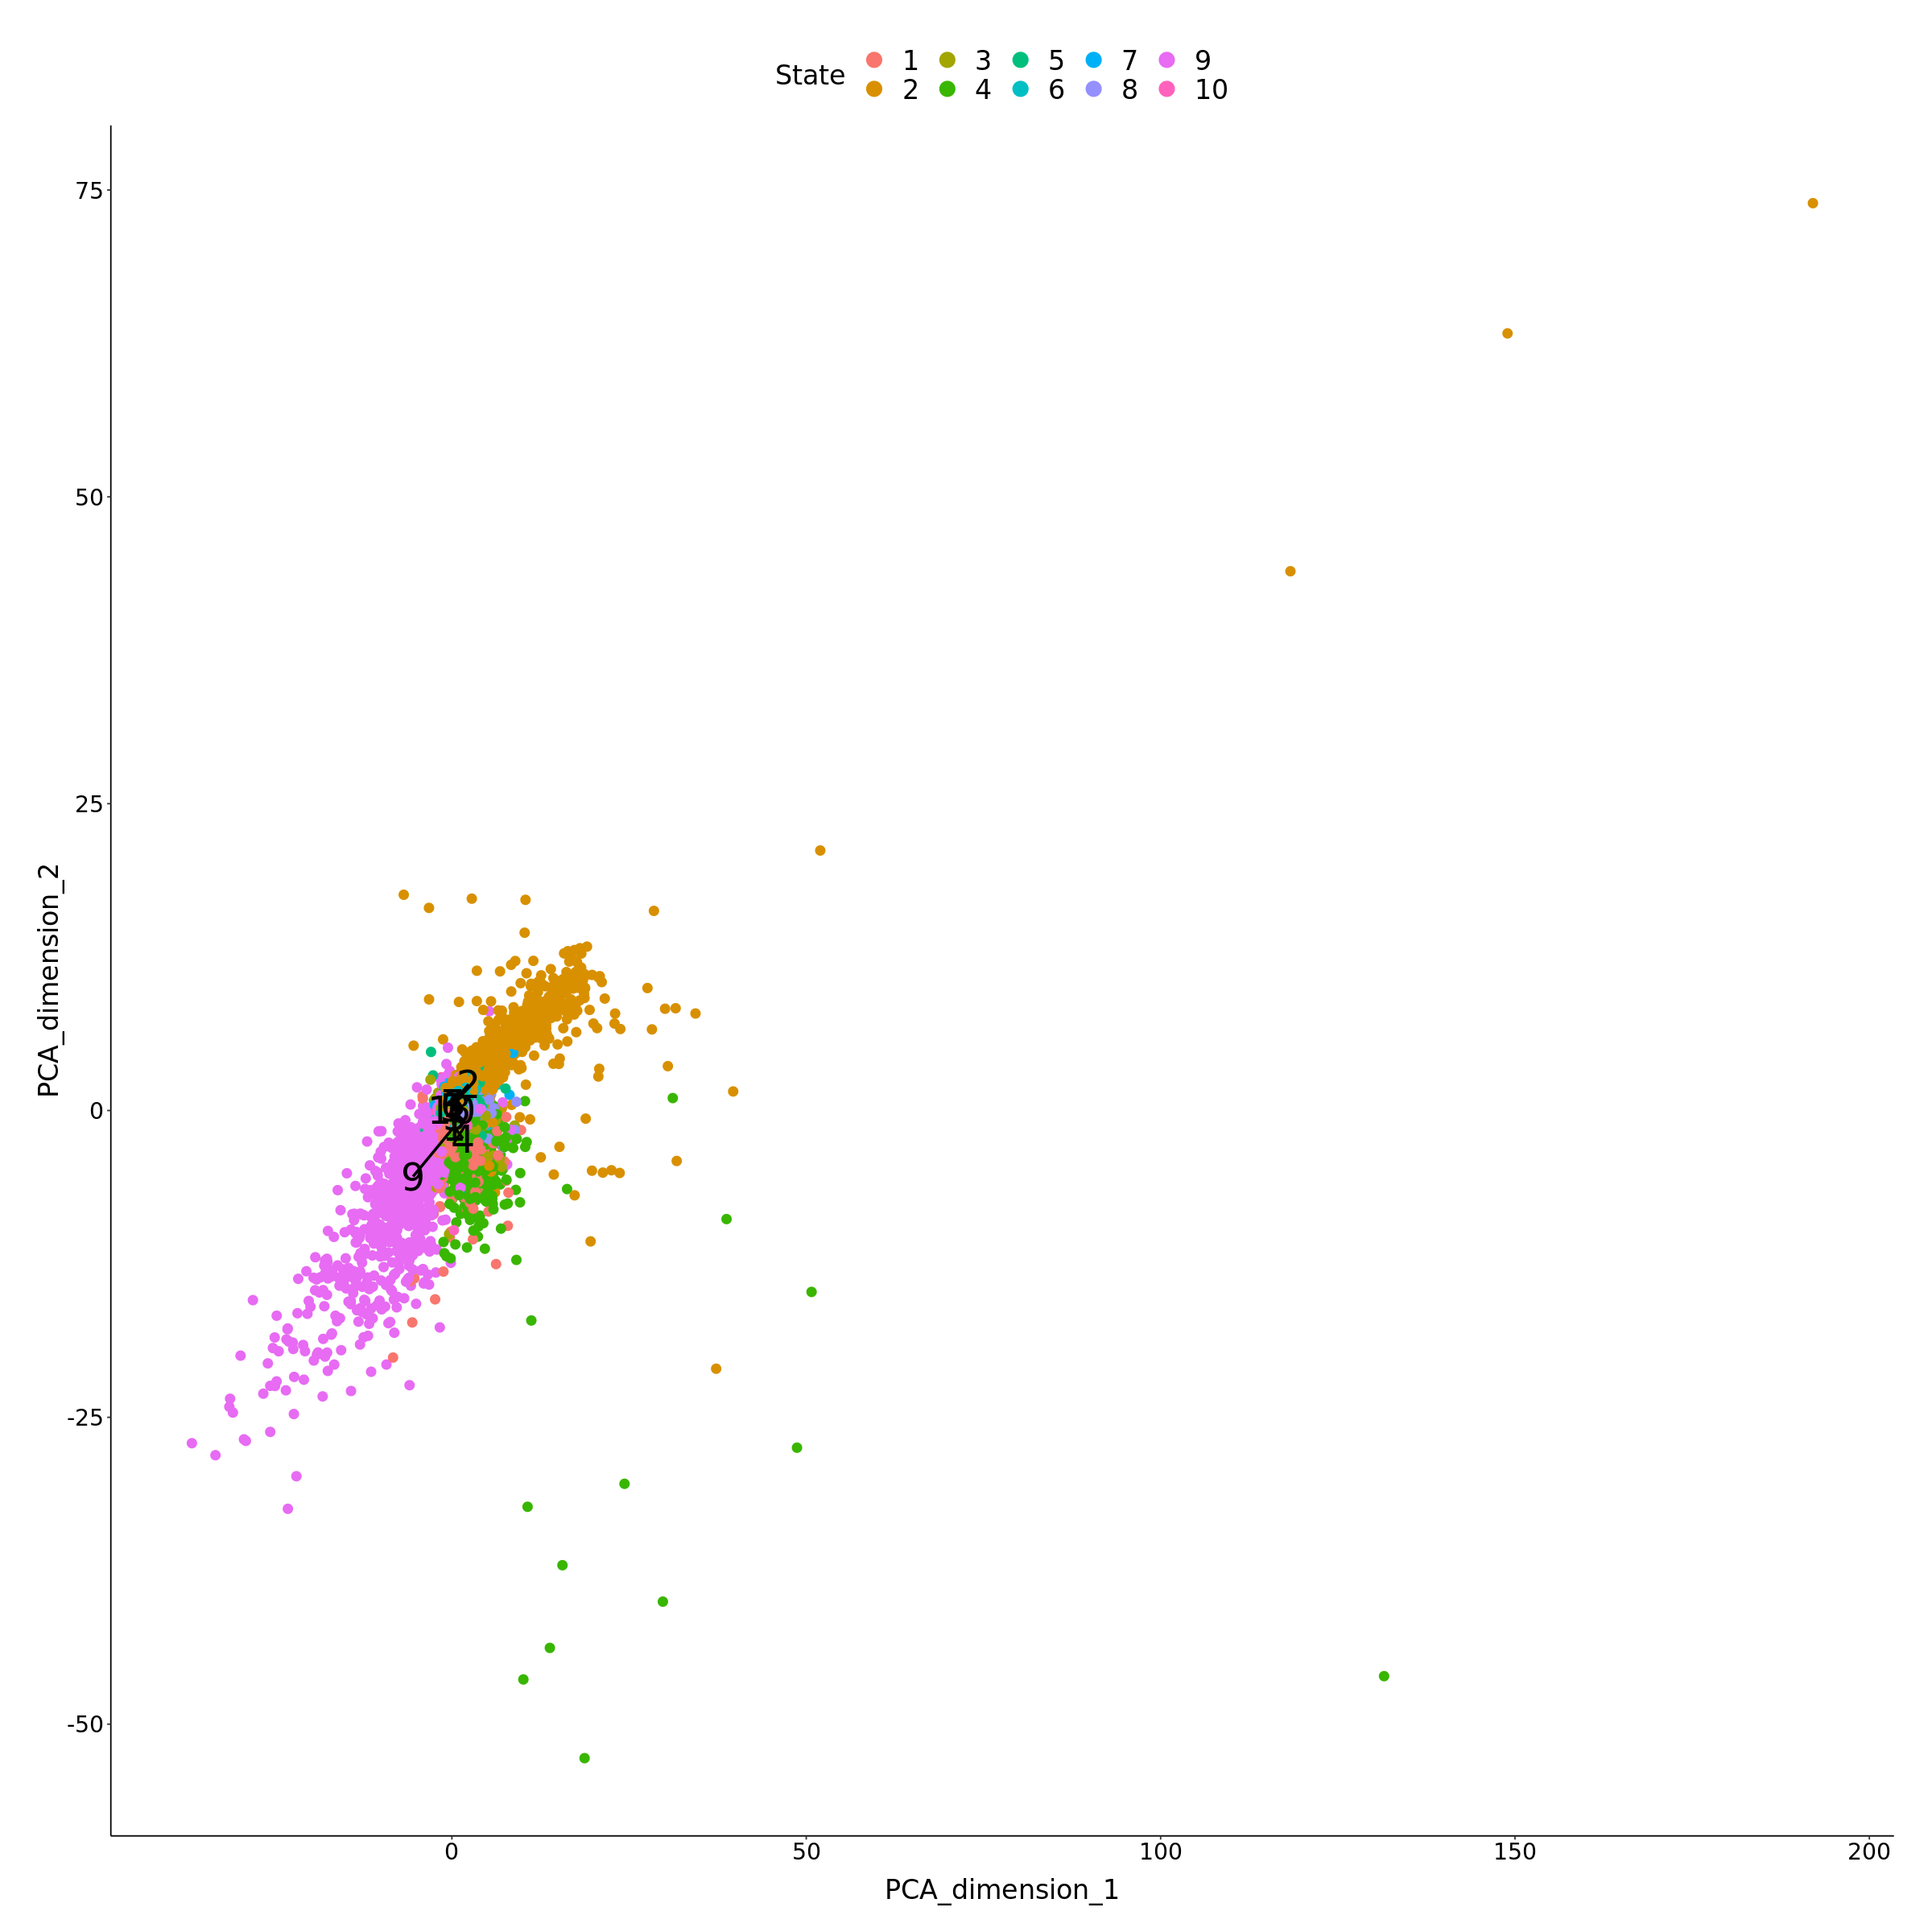

In [88]:
plotmclust(PCA_cluster)+scale_shape_manual(values=c(1:50))

In [90]:
PCA_cluster_order = TSCANorder(PCA_cluster)

## Testing on Using Imported UMAP Coordinates

In [71]:
UMAP_coordinates = read.csv('/scratch/UMAP_coordinates.csv',row.names=1)

In [72]:
# casting the cluster annotation into natural number representing "states" as referred to by TSCAN
# this is necessar for TSCAN to work
clusterid = as.numeric(as.factor(UMAP_coordinates['cluster',]))
UMAP_coordinates = UMAP_coordinates[1:2,]
names(clusterid) = colnames(UMAP_coordinates)
# the reduce=F argument is crucial, without it the function performs SVD again
umap_cluster = exprmclust(UMAP_coordinates,cluster=clusterid,reduce=F)

In [73]:
set_plot_dimensions(20,20)

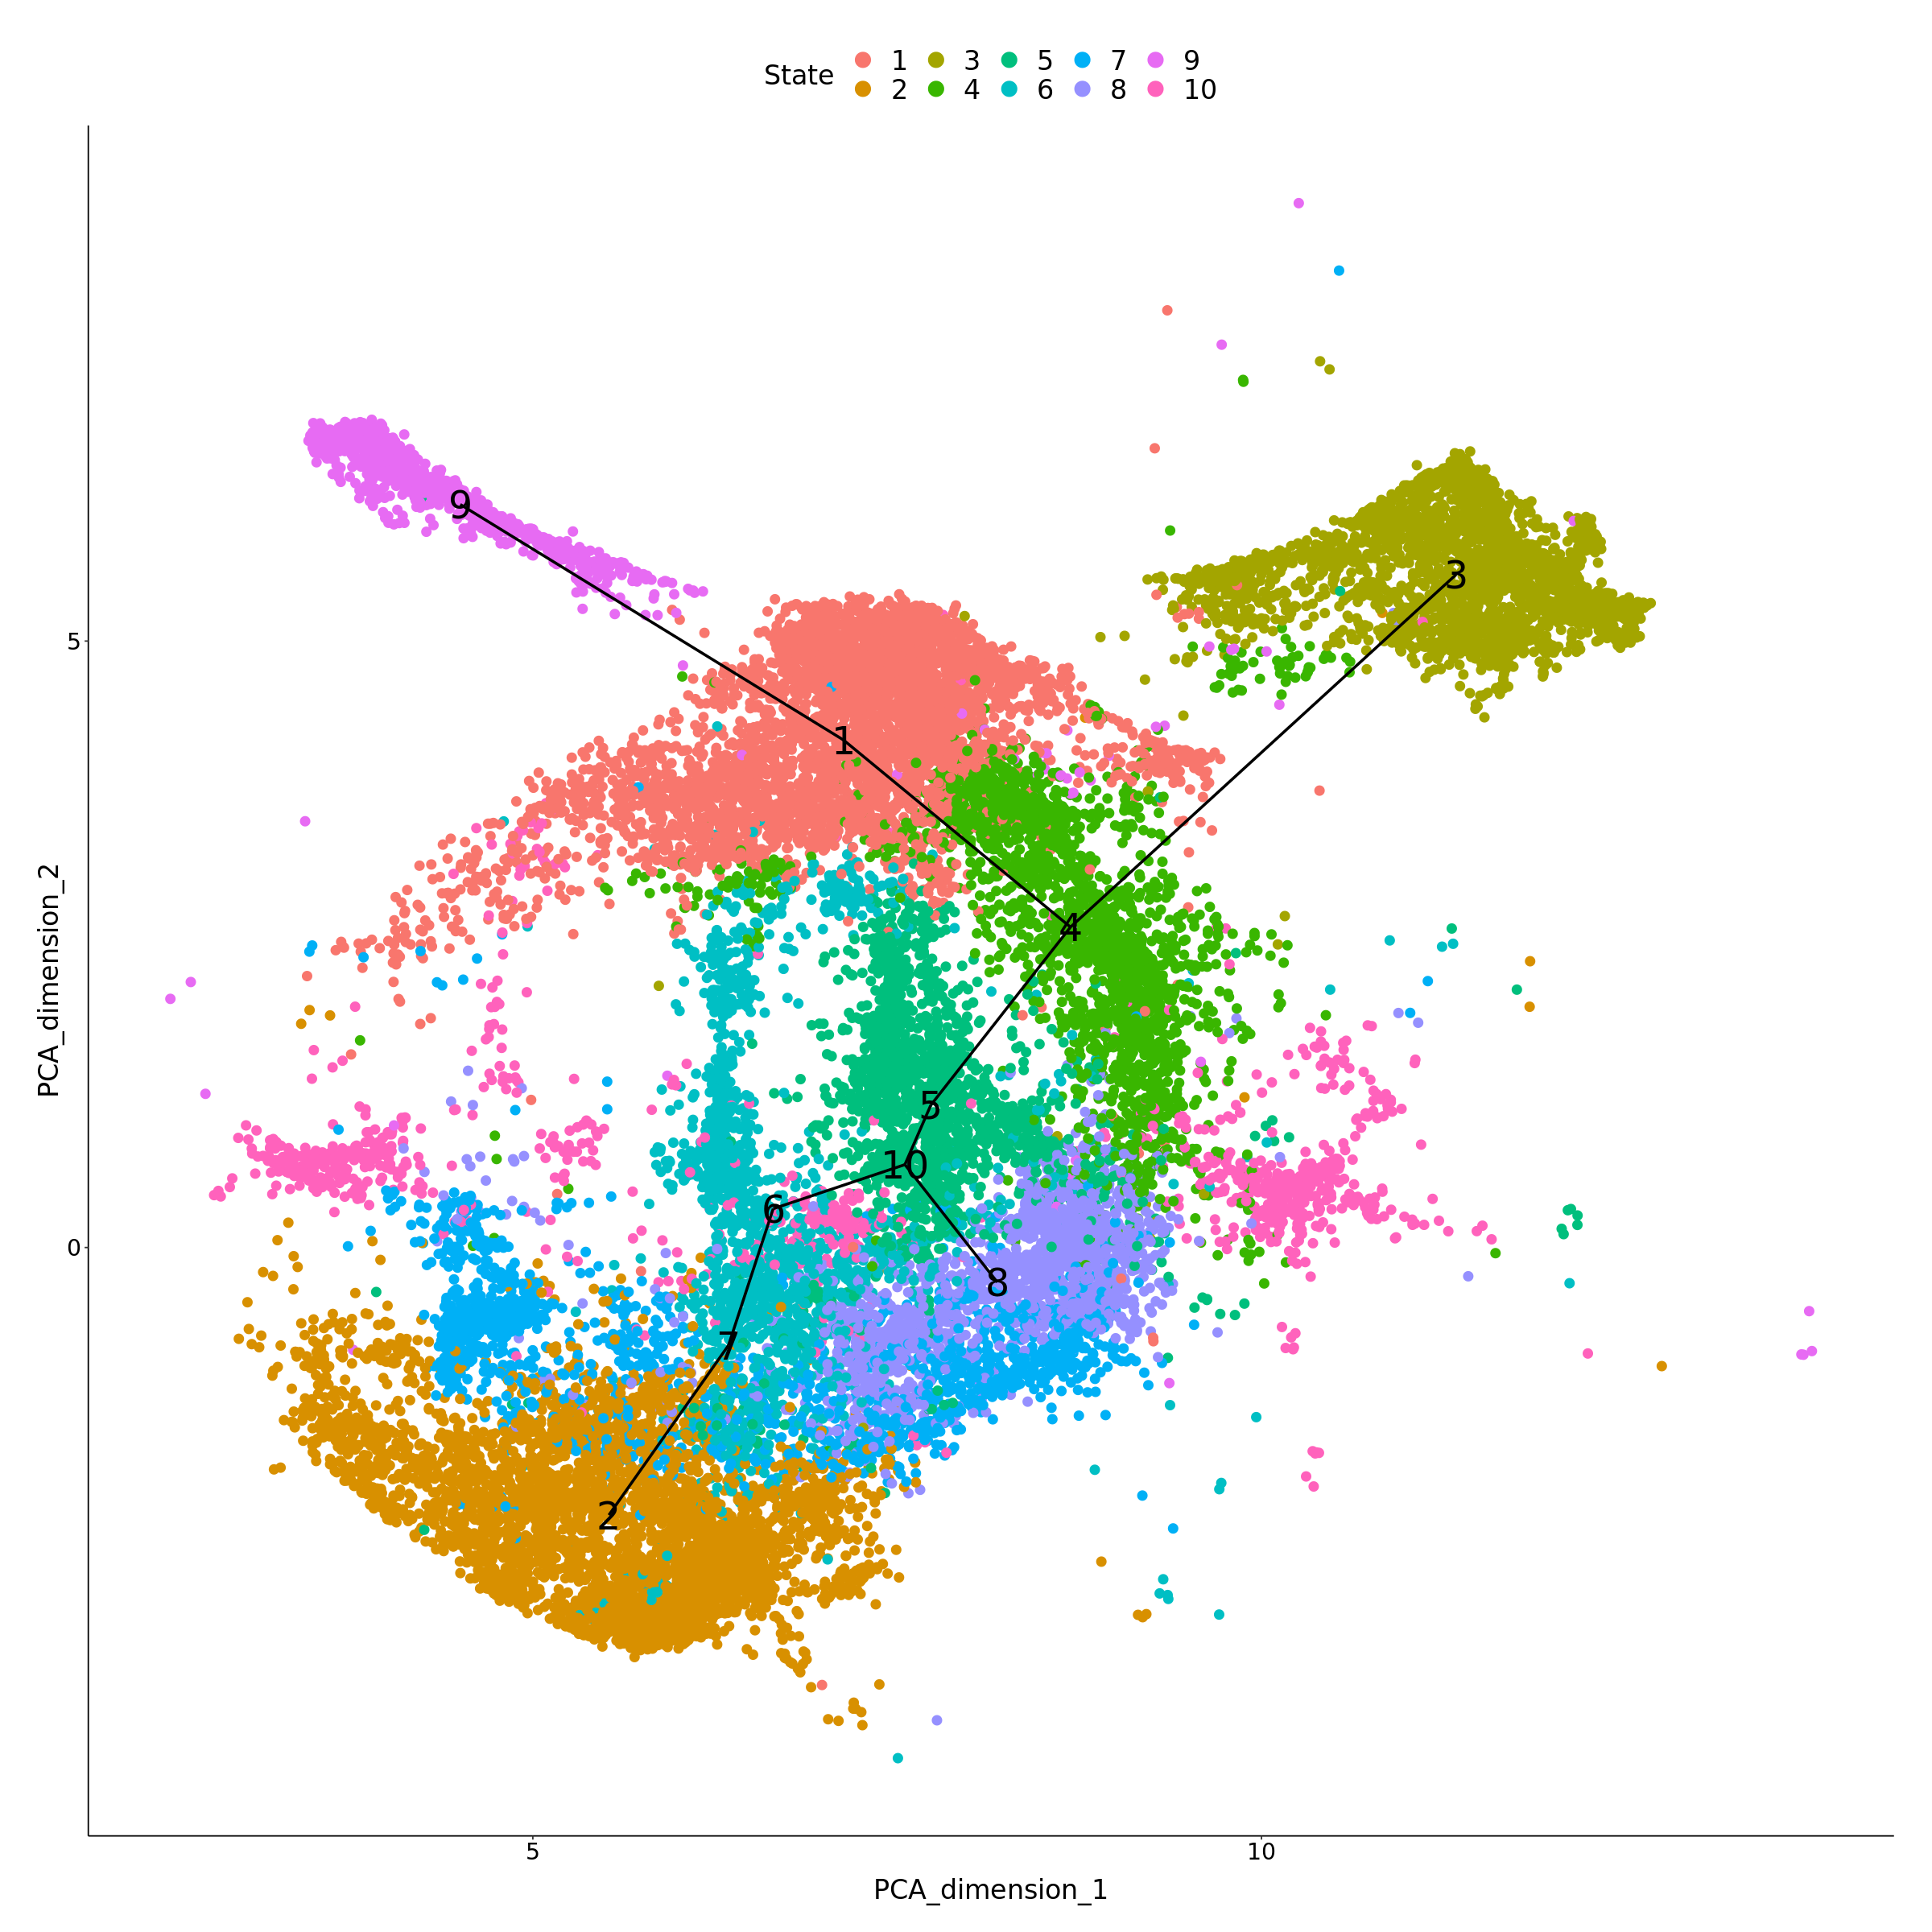

In [74]:
plotmclust(umap_cluster)+scale_shape_manual(values=c(0:23))

In [89]:
umap_cluster_order = TSCANorder(umap_cluster)

In [81]:
get_path <- function(ann,path){
    mylist = c()
    for(state in path){
        mylist = c(mylist,ann[state])
    }
    print(mylist)
}

## Differential Expression along Trajectory

In [92]:
expression_matrix = read.csv('/scratch/trajectory_expression_data/expression_matrix.csv',row.names=1)

In [93]:
rownames(expression_matrix) = expression_matrix[,'gene']

In [94]:
expression_matrix = expression_matrix[,-1]

In [97]:
PCA_diffval = difftest(expression_matrix, PCA_cluster_order)

In [98]:
row.names(PCA_diffval)[diffval$qval < 0.05]

[1] "TNFRSF18"  "TNFRSF4"   "TNFRSF9"   "C1QC"      "ID3"       "STMN1"    
  [7] "CDC20"     "CD160"     "CD1C"      "FCER1G"    "FCGR2A"    "XCL2"     
 [13] "XCL1"      "SELL"      "PTGS2"     "ASPM"      "PTPRC"     "G0S2"     
 [19] "CENPF"     "GNLY"      "CD8A"      "CD8B"      "IGKC"      "IL1R2"    
 [25] "IL1B"      "IL1RN"     "CD28"      "CTLA4"     "ICOS"      "SLC11A1"  
 [31] "PDCD1"     "EOMES"     "CCR5"      "STAB1"     "DNASE1L3"  "BTLA"     
 [37] "TIGIT"     "HES1"      "JCHAIN"    "CXCL8"     "CXCL3"     "CXCL2"    
 [43] "EREG"      "AREG"      "CXCL13"    "IL2"       "LINC02362" "GZMK"     
 [49] "GZMA"      "NREP"      "TCF7"      "TGFBI"     "MZB1"      "CD14"     
 [55] "CD74"      "HAVCR2"    "CD83"      "SOX4"      "HIST1H4C"  "HIST1H2AJ"
 [61] "TUBB"      "IER3"      "TNF"       "AIF1"      "HSPA1A"    "PLA2G7"   
 [67] "PKIB"      "SOD2"      "CCR6"      "CPVL"      "TMEM176B"  "TMEM176A" 
 [73] "IL3RA"     "TIMP1"     "FOXP3"     "CXCR3"     "CTSB"      "FABP5"    
 [79] "GEM"       "SDC2"      "TPM2"      "CTSL"      "FBP1"      "KLF4"     
 [85] "GSN"       "PTGDS"     "IFITM3"    "CD44"      "SPI1"      "SERPING1" 
 [91] "MS4A6A"    "MS4A4A"    "MS4A7"     "MS4A1"     "FTH1"      "CTSW"     
 [97] "SERPINH1"  "B3GAT1"    "IL2RA"     "GATA3"     "MRC1"      "PRF1"     
[103] "PAPSS2"    "FAS"       "ENTPD1"    "MKI67"     "LAG3"      "CD4"      
[109] "CD163"     "KLRG1"     "IL23A"     "IFNG"      "LYZ"       "ALDH2"    
[115] "GZMH"      "GZMB"      "LGMN"      "IFI27"     "SERPINA1"  "TCL1A"    
[121] "PLD4"      "C15orf48"  "PCLAF"     "BCL2A1"    "IGSF6"     "CCL22"    
[127] "SERPINF1"  "ITGAE"     "CLEC10A"   "CD68"      "CCL3"      "CCL3L1"   
[133] "CCL4L2"    "TOP2A"     "CCR7"      "GRN"       "TBX21"     "PECAM1"   
[139] "TYMS"      "RAB31"     "THBD"      "CST3"      "MAFB"      "UBE2C"    
[145] "GZMM"      "JSRP1"     "ICAM1"     "IFI30"     "TYROBP"    "PPP1R14A" 
[151] "CD79A"     "CD177"     "PLAUR"     "C5AR1"     "FTL"       "NKG7"     
[157] "LILRA4"    "LILRB4"    "IGLV3-19"  "DERL3"     "IL2RB"     "LGALS2"